In [4]:
!pip install anthropic
!pip install google
!pip install beautifulsoup4 requests 
!pip install pypdf
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


The code below is designed to take the school and the major, and return the list of courses which may be used to satisfy that course. 

In [5]:
#This data was aggregated by printing the major requirements, pasting it into Claude 3 Opus AI, and having it extract the classes

#san francisco state university 
['CSC 848 Software Engineering',
 'CSC 842 Human-Computer Interaction',
 'CSC 852 Introduction to Security and Data Privacy',
 'CSC 864 Multimedia Systems', 'CSC 897 Research',
 'CSC 849 Search Engines', 'ISYS 850 Seminar in Business Intelligence', 'CSC 869 Data Mining', 'CSC 865 Artificial Intelligence', 'MATH 741 Probability and Statistics II', 'CSC 859 AI Explainability and Ethics', 'CSC 810 Analysis of Algorithms II', 'CSC 876 Soft Computing and Decision Support Systems', 'CSC 821 Biomedical Imaging and Analysis', 'MGMT 850 Ethics and Compliance in Business', 'CSC 805 Data Visualization: Concepts, Tools, Techniques, and Paradigms', 'CSC 875', 'CSC 847 Cloud and Distributed Computing: Concepts and Applications', 'CSC 871 Deep Learning', 'MATH 440 Probability and Statistics I', 'CSC 857 Bioinformatics Computing', 'CSC 874 Topics in Big Data Analysis', 'MKTG 886 Seminar in Marketing Analytics', 'CSC 893 Supervised Industrial Research', 'CSC 890 Graduate Seminar', 'CSC 878 Big Data Platforms and Systems', 'MATH 448 Introduction to Statistical Learning and Data Mining', 'CSC 872 Pattern Analysis and Machine Intelligence', 'CSC 820 Natural Language Technologies', 'CSC 899 Independent Study']

#san jose state university
required_classes = [
"CMPE 252 - Artificial Intelligence and Data Engineering",
"CMPE 257 - Machine Learning",
"ISE 201 - Math Foundations for Decision and Data Sciences",
"CMPE 255 - Data Mining",
"CMPE 256 - Advanced Data Mining",
"CMPE 258 - Deep Learning",
"CMPE 249 - Intelligent Autonomous Systems",
"CMPE 258 - Deep Learning",
"CMPE 260 - Reinforcement Learning",
"CMPE 249 - Intelligent Autonomous Systems",
"CMPE 255 - Data Mining",
"CMPE 256 - Advanced Data Mining",
"CMPE 258 - Deep Learning",
"CMPE 260 - Reinforcement Learning",
"CMPE 214 - GPU Architecture and Programming",
"CMPE 217 - Human Computer Interaction",
"CMPE 243 - Embedded Systems Applications",
"CMPE 266 - Big Data Engineering and Analytics",
"CMPE 281 - Cloud Technologies",
"CMPE 297 - Special Topics in Computer/Software Engineering",
"CMPE 298 - Special Problems",
"ISE 244 - AI Tools and Practice for Systems Engineering",
"CMPE 294 - Computer Engineering Seminar",
"ENGR 200W - Engineering Reports and Graduate Research",
"CMPE 299A - Master Thesis I",
"CMPE 299B - Master Thesis II",
"CMPE 295A",
"CMPE 295B"
]


In [6]:
# class_teachers_san_francisco = {
# "CSC 849 Search Engines": [],
# "CSC 865 Artificial Intelligence": [("Lothar Narins", ""), ("Tyler Devlin", ""), ("Akila de Silva", "")],
# "CSC 869 Data Mining": [("Hui Yang", "")],
# "CSC 872 Pattern Analysis and Machine Intelligence": [("Kazunori Okada", "")],
# "CSC 810 Analysis of Algorithms II": [("Timothy Sun", "")],
# "CSC 871 Deep Learning": [("Robert Mateescu", "")],
# "CSC 876 Soft Computing and Decision Support Systems": [("Jozo Dujmovic", "")],
# "CSC 848 Software Engineering": [("Isabel Hyo Jung Song", ""), ("Henry Villar", ""), ("Dragutin Petkovic", ""), ("Jose Ortiz Costa", "")],
# "CSC 864 Multimedia Systems": [],
# "CSC 874 Topics in Big Data Analysis": [],
# "CSC 875": [],
# "CSC 878 Big Data Platforms and Systems": [],
# "MATH 440 Probability and Statistics I": [],
# "MATH 448 Introduction to Statistical Learning and Data Mining": [],
# "CSC 805 Data Visualization: Concepts, Tools, Techniques, and Paradigms": [("Shahrukh Humayoun", "")],
# "CSC 820 Natural Language Technologies": [("Anagha Kulkarni", "")],
# "CSC 821 Biomedical Imaging and Analysis": [("Kazunori Okada", "")],
# "CSC 842 Human-Computer Interaction": [("Shahrukh Humayoun", "")],
# "CSC 847 Cloud and Distributed Computing: Concepts and Applications": [],
# "CSC 852 Introduction to Security and Data Privacy": [],
# "CSC 857 Bioinformatics Computing": [],
# "CSC 859 AI Explainability and Ethics": [("Dragutin Petkovic", "")],
# "CSC 890 Graduate Seminar": [("Isabel Hyo Jung Song", "")],
# "CSC 897 Research": [("Shahrukh Humayoun", "")],
# "CSC 899 Independent Study": [("Qun Wang", "")],
# "ISYS 850 Seminar in Business Intelligence": [],
# "MATH 741 Probability and Statistics II": [],
# "MGMT 850 Ethics and Compliance in Business": [],
# "MKTG 886 Seminar in Marketing Analytics": [],
# "CSC 893 Supervised Industrial Research": [("Shahrukh Humayoun", "")],
# "CSC 895 Applied Research Project": [("Qun Wang", ""), ("Dragutin Petkovic", "")],
# "CSC 898 Master's Thesis": [("Shahrukh Humayoun", ""), ("Hao Yue", ""), ("Qun Wang", ""), ("Dragutin Petkovic", "")]
# }

# class_teachers_san_jose = {
# "CMPE 252 - Artificial Intelligence and Data Engineering": [("Stas Tiomkin", ""), ("Jun Liu", "")],
# "CMPE 257 - Machine Learning": [("Bernardo Floriano Melo", ""), ("Charles Zhang", ""), ("Mahima Agumbe Subramanian", "")],
# "ISE 201 - Math Foundations for Decision and Data Sciences": [("Shilpa Gupta", "")],
# "CMPE 255 - Data Mining": [("Kaikai Liu", ""), ("Taehee Jeong", ""), ("Taehee Jeong", ""), ("Gheorghi Guzun", "")],
# "CMPE 256 - Advanced Data Mining": [("Jun Liu", ""), ("Magdalini Eirinaki", "")],
# "CMPE 258 - Deep Learning": [("Kaikai Liu", ""), ("Harry Li", "")],
# "CMPE 249 - Intelligent Autonomous Systems": [("Kaikai Liu", ""), ("Wencen Wu", "")],
# "CMPE 260 - Reinforcement Learning": [],
# "CMPE 214 - GPU Architecture and Programming": [("Haonan Wang", "")],
# "CMPE 217 - Human Computer Interaction": [("Abbas Moallem", ""), ("Abbas Moallem", "")],
# "CMPE 243 - Embedded Systems Applications": [("Preetpal Kang", ""), ("Harry Li", "")],
# "CMPE 266 - Big Data Engineering and Analytics": [("Weider Yu", "")],
# "CMPE 281 - Cloud Technologies": [("Zeyu Gao", "")],
# "CMPE 297 - Special Topics in Computer/Software Engineering": [("Jun Liu", ""), ("Mahima Agumbe Subramanian", "")],
# "CMPE 298 - Special Problems": [("Rod Fatoohi", ""), ("Magdalini Eirinaki", "")],
# "ISE 244 - AI Tools and Practice for Systems Engineering": [("Shilpa Gupta", "")],
# "CMPE 294 - Computer Engineering Seminar": [("Tridha Chakraborty", ""), ("Soumya Gupta", ""), ("Soumya Gupta", ""), ("Tridha Chakraborty", ""), ("Tridha Chakraborty", ""), ("Bonnie Hsia", ""), ("Tridha Chatterjee", ""), ("Bonnie Hsia", ""), ("Soumya De", ""), ("Tridha Chatterjee", ""), ("Tridha Chatterjee", ""), ("Tridha Chatterjee", ""), ("Soumya De", "")],
# "ENGR 200W - Engineering Reports and Graduate Research": [],
# "CMPE 299A - Master Thesis I": [("Hee Park", "")],
# "CMPE 299B - Master Thesis II": [("Hee Park", "")],
# "CMPE 295A": [("Magdalini Eirinaki", ""), ("Magdalini Eirinaki", ""), ("Weider Yu", ""), ("Dan Harkey", ""), ("Dan Harkey", ""), ("Harry Li", "")],
# "CMPE 295B": [("Stas Tiomkin", ""), ("Jorjeta Jetcheva", ""), ("Gheorghi Guzun", ""), ("Magdalini Eirinaki", ""), ("Carlos Rojas", ""), ("Magdalini Eirinaki", ""),  ("Haonan Wang", ""), ("Weider Yu", ""), ("Dan Harkey", ""), ("Dan Harkey", ""), ("Harry Li", ""), ("Stas Tiomkin", ""), ("Dan Harkey", "")]
# }


#This data was aggregated by printing the academic schedule for the past year, pasting it into Claude 3 Opus along with the major requirements, and creating a list correlating major classes to the teachers that teach them 
class_teachers_san_francisco = {
"CSC 849 Search Engines": [],
"CSC 865 Artificial Intelligence": ["Lothar Narins", "Tyler Devlin", "Akila de Silva"],
"CSC 869 Data Mining": ["Hui Yang"],
"CSC 872 Pattern Analysis and Machine Intelligence": ["Kazunori Okada"],
"CSC 810 Analysis of Algorithms II": ["Timothy Sun"],
"CSC 871 Deep Learning": ["Robert Mateescu"],
"CSC 876 Soft Computing and Decision Support Systems": ["Jozo Dujmovic"],
"CSC 848 Software Engineering": ["Isabel Hyo Jung Song", "Henry Villar", "Dragutin Petkovic", "Jose Ortiz Costa"],
"CSC 864 Multimedia Systems": [],
"CSC 874 Topics in Big Data Analysis": [],
"CSC 875": [],
"CSC 878 Big Data Platforms and Systems": [],
"MATH 440 Probability and Statistics I": [],
"MATH 448 Introduction to Statistical Learning and Data Mining": [],
"CSC 805 Data Visualization: Concepts, Tools, Techniques, and Paradigms": ["Shahrukh Humayoun"],
"CSC 820 Natural Language Technologies": ["Anagha Kulkarni"],
"CSC 821 Biomedical Imaging and Analysis": ["Kazunori Okada"],
"CSC 842 Human-Computer Interaction": ["Shahrukh Humayoun"],
"CSC 847 Cloud and Distributed Computing: Concepts and Applications": [],
"CSC 852 Introduction to Security and Data Privacy": [],
"CSC 857 Bioinformatics Computing": [],
"CSC 859 AI Explainability and Ethics": ["Dragutin Petkovic"],
"CSC 890 Graduate Seminar": ["Isabel Hyo Jung Song"],
"CSC 897 Research": ["Shahrukh Humayoun"],
"CSC 899 Independent Study": ["Qun Wang"],
"ISYS 850 Seminar in Business Intelligence": [],
"MATH 741 Probability and Statistics II": [],
"MGMT 850 Ethics and Compliance in Business": [],
"MKTG 886 Seminar in Marketing Analytics": [],
"CSC 893 Supervised Industrial Research": ["Shahrukh Humayoun"],
"CSC 895 Applied Research Project": ["Qun Wang", "Dragutin Petkovic"],
"CSC 898 Master's Thesis": ["Shahrukh Humayoun", "Hao Yue", "Qun Wang", "Dragutin Petkovic"]
}
class_teachers_san_jose = {
"CMPE 252 - Artificial Intelligence and Data Engineering": ["Stas Tiomkin", "Jun Liu"],
"CMPE 257 - Machine Learning": ["Bernardo Floriano Melo", "Charles Zhang", "Mahima Agumbe Subramanian"],
"ISE 201 - Math Foundations for Decision and Data Sciences": ["Shilpa Gupta"],
"CMPE 255 - Data Mining": ["Kaikai Liu", "Taehee Jeong", "Taehee Jeong", "Gheorghi Guzun"],
"CMPE 256 - Advanced Data Mining": ["Jun Liu", "Magdalini Eirinaki"],
"CMPE 258 - Deep Learning": ["Kaikai Liu", "Harry Li"],
"CMPE 249 - Intelligent Autonomous Systems": ["Kaikai Liu", "Wencen Wu"],
"CMPE 260 - Reinforcement Learning": [],
"CMPE 214 - GPU Architecture and Programming": ["Haonan Wang"],
"CMPE 217 - Human Computer Interaction": ["Abbas Moallem", "Abbas Moallem"],
"CMPE 243 - Embedded Systems Applications": ["Preetpal Kang", "Harry Li"],
"CMPE 266 - Big Data Engineering and Analytics": ["Weider Yu"],
"CMPE 281 - Cloud Technologies": ["Zeyu Gao"],
"CMPE 297 - Special Topics in Computer/Software Engineering": ["Jun Liu", "Mahima Agumbe Subramanian"],
"CMPE 298 - Special Problems": ["Rod Fatoohi", "Magdalini Eirinaki"],
"ISE 244 - AI Tools and Practice for Systems Engineering": ["Shilpa Gupta"],
"CMPE 294 - Computer Engineering Seminar": ["Tridha Chakraborty", "Soumya Gupta", "Soumya Gupta", "Tridha Chakraborty", "Tridha Chakraborty", "Bonnie Hsia", "Tridha Chatterjee", "Bonnie Hsia", "Soumya De", "Tridha Chatterjee", "Tridha Chatterjee", "Tridha Chatterjee", "Soumya De"],
"ENGR 200W - Engineering Reports and Graduate Research": [],
"CMPE 299A - Master Thesis I": ["Hee Park"],
"CMPE 299B - Master Thesis II": ["Hee Park"],
"CMPE 295A": ["Magdalini Eirinaki", "Magdalini Eirinaki", "Weider Yu", "Dan Harkey", "Dan Harkey", "Harry Li"],
"CMPE 295B": ["Stas Tiomkin", "Jorjeta Jetcheva", "Gheorghi Guzun", "Magdalini Eirinaki", "Carlos Rojas", "Magdalini Eirinaki",  "Haonan Wang", "Weider Yu", "Dan Harkey", "Dan Harkey", "Harry Li", "Stas Tiomkin", "Dan Harkey"]
}


In [7]:
#handles getting raw text from websites, used to extract data from RateMyProfessor.com
import requests
from bs4 import BeautifulSoup

def get_visible_text(url):
    try:
        # Fetch the webpage
        response = requests.get(url)
        response.raise_for_status()  # Ensure the request was successful
        
        # Parse the webpage with Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extract visible text from the webpage
        for script in soup(["script", "style"]):  # Remove scripts and styles
            script.extract()
        text = soup.get_text()

        # Clean up the text
        lines = (line.strip() for line in text.splitlines())
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        text = '\n'.join(chunk for chunk in chunks if chunk)
        return text
    except requests.RequestException as e:
        return str(e)  # Handle any exceptions that might occur




In [8]:
import json
from anthropic import Client
import anthropic
import copy
from googlesearch import search
import os

api_key=os.environ.get("ANTHROPIC_API_KEY")
client = anthropic.Anthropic(
    api_key=os.environ.get("ANTHROPIC_API_KEY"),
)

def make_api_request(client, model, system_prompt, user_message, max_retries=3):
    retry_count = 0
    while retry_count < max_retries:
        try:
            message = client.messages.create(
                model=model,
                max_tokens=1000,
                temperature=1.0,
                system=system_prompt,
                messages=[
                    {"role": "user", "content": user_message}
                ]
            )
            response_text = message.content[0].text
            response_json = json.loads(response_text)
            return response_json
        except json.JSONDecodeError:
            retry_count += 1
            print(f"JSONDecodeError occurred. Retrying... (Attempt {retry_count}/{max_retries})")
            print(f"bad text was: {response_text}")
    
    raise Exception("Max retries exceeded. Unable to get valid JSON response.")

def compare_names(client, name1, name2, max_retries=3):
    system_prompt = f"""
    You are an agent that compares two names to determine if they refer to the same person, allowing for slight differences in the text.
    Please answer the following question in JSON format:
    Do "{name1}" and "{name2}" refer to the same person? (true/false)
    Format your response as follows:
    {{
        "same_person": true/false
    }}
    RETURN JSON NOTHING ELSE
    """
    
    response_json = make_api_request(client, "claude-3-haiku-20240307", system_prompt, ".", max_retries)
    return response_json["same_person"]

def get_teacher_rating(client, teacher_name, school_name, webpage_text, max_chars, max_retries=3):
    if not webpage_text.strip():
        return {
            "rating": "N/A",
            "num_ratings": "N/A"
        }

    system_prompt = f"""
    You are an agent that extracts teacher ratings from text data.
    For the given webpage text, please answer the following questions in JSON format:
    1. Is this a RateMyProfessor rating page? (true/false)
    2. If it is a RateMyProfessor rating page, what is the name of the teacher? If not, respond with "N/A".
    3. If it is a RateMyProfessor rating page, what is the name of the school? If not, respond with "N/A".
    Format your response as follows:
    {{
        "is_rating_page": true/false,
        "teacher_name": "teacher_name"/N/A,
        "school_name": "school_name"/N/A
    }}
    RETURN JSON NOTHING ELSE
    """
    
    response_json = make_api_request(client, "claude-3-haiku-20240307", system_prompt, webpage_text[:max_chars], max_retries)
    
    if response_json["is_rating_page"] and compare_names(client, response_json["teacher_name"], teacher_name) and compare_names(client, response_json["school_name"], school_name):
        system_prompt = f"""
        You are an agent that extracts teacher ratings from text data.
        For the given webpage text, please answer the following questions in JSON format:
        1. What is the numerical rating of the teacher?
        2. How many ratings does the teacher have?
        Format your response as follows:
        {{
            "rating": numerical_rating,
            "num_ratings": number_of_ratings
        }}
        RETURN JSON NOTHING ELSE
        """
        
        response_json = make_api_request(client, "claude-3-haiku-20240307", system_prompt, webpage_text[:max_chars], max_retries)
        return response_json
    else:
        return {
            "rating": "N/A",
            "num_ratings": "N/A"
        }

def get_webpage_text_for_teacher(teacher_name):
    query = f"Rate My Professor {teacher_name}"
    urls = search(query, stop=3)  # Increase the number of search results
    webpage_texts = []
    for url in urls:
        webpage_text = get_visible_text(url)
        if webpage_text.strip():
            webpage_texts.append(webpage_text)
    return webpage_texts

def find_ratings_for_teachers(class_teacher_dict, school_name, max_chars=2000):
    class_teacher_dict_copy = copy.deepcopy(class_teacher_dict)
    teacher_ratings = {}
    
    for course, teachers in class_teacher_dict_copy.items():
        for i, teacher_name in enumerate(teachers):
            if teacher_name not in teacher_ratings:
                print(teacher_name)
                webpage_texts = get_webpage_text_for_teacher(teacher_name)
                rating_found = False
                
                for webpage_text in webpage_texts:
                    rating = get_teacher_rating(client, teacher_name, school_name, webpage_text, max_chars)
                    if rating["rating"] != "N/A":
                        teacher_ratings[teacher_name] = {
                            "rating": rating["rating"],
                            "num_ratings": rating["num_ratings"],
                            "webpage_text": webpage_text[:max_chars]
                        }
                        rating_found = True
                        break
                
                if not rating_found:
                    teacher_ratings[teacher_name] = {
                        "rating": "N/A",
                        "num_ratings": "N/A",
                        "webpage_text": ""
                    }
            
            class_teacher_dict_copy[course][i] = [
                teacher_name,
                teacher_ratings[teacher_name]["rating"],
                teacher_ratings[teacher_name]["num_ratings"]
            ]

    return class_teacher_dict_copy, teacher_ratings

sf_teacher_ratings, sf_teacher_webpage_texts = find_ratings_for_teachers(class_teachers_san_francisco, "San Francisco State University")
# san_jose_teacher_ratings, sj_teacher_webpage_texts = find_ratings_for_teachers(class_teachers_san_jose, "San Jose State University")

# Test code to print teacher names and webpage texts
for teacher_name, webpage_data in sj_teacher_webpage_texts.items():
    print(f"Teacher: {teacher_name}")
    print(f"Webpage Text (first 2000 characters):\n{webpage_data['webpage_text'][:2000]}\n")
    input("press enter")

Lothar Narins


Tyler Devlin
Akila de Silva
Hui Yang
Kazunori Okada
Timothy Sun
Robert Mateescu
Jozo Dujmovic
Isabel Hyo Jung Song
Henry Villar
Dragutin Petkovic
Jose Ortiz Costa
Shahrukh Humayoun
Anagha Kulkarni
Qun Wang
Hao Yue


NameError: name 'sj_teacher_webpage_texts' is not defined

In [ ]:
def print_teacher_ratings(teacher_ratings):
    for course, teachers in teacher_ratings.items():
        print(f"Course: {course}")
        if not teachers:
            print("  No teacher ratings available.")
        else:
            for teacher in teachers:
                name = teacher[0]
                rating = teacher[1] if teacher[1] != '0' else 'N/A'
                num_ratings = teacher[2] if teacher[2] != '0' else 'N/A'
                print(f"  Teacher: {name}")
                print(f"    Rating: {rating}")
                print(f"    Number of Ratings: {num_ratings}")
        print()

print_teacher_ratings(sf_teacher_ratings)

Course: CSC 849 Search Engines
  No teacher ratings available.

Course: CSC 865 Artificial Intelligence
  Teacher: Lothar Narins
    Rating: N/A
    Number of Ratings: N/A
  Teacher: Tyler Devlin
    Rating: N/A
    Number of Ratings: N/A
  Teacher: Akila de Silva
    Rating: N/A
    Number of Ratings: N/A

Course: CSC 869 Data Mining
  Teacher: Hui Yang
    Rating: 3.5
    Number of Ratings: 77

Course: CSC 872 Pattern Analysis and Machine Intelligence
  Teacher: Kazunori Okada
    Rating: 3.4
    Number of Ratings: 5

Course: CSC 810 Analysis of Algorithms II
  Teacher: Timothy Sun
    Rating: N/A
    Number of Ratings: N/A

Course: CSC 871 Deep Learning
  Teacher: Robert Mateescu
    Rating: N/A
    Number of Ratings: N/A

Course: CSC 876 Soft Computing and Decision Support Systems
  Teacher: Jozo Dujmovic
    Rating: 2.1
    Number of Ratings: 44

Course: CSC 848 Software Engineering
  Teacher: Isabel Hyo Jung Song
    Rating: N/A
    Number of Ratings: N/A
  Teacher: Henry Villar


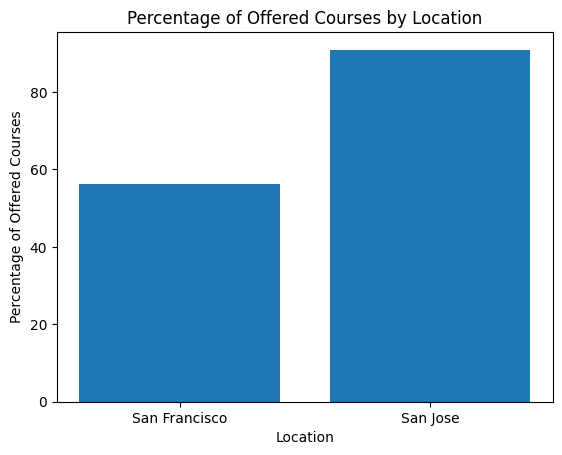

In [ ]:
import matplotlib.pyplot as plt

def calculate_offered_courses_percentage(teacher_ratings):
    total_courses = len(teacher_ratings)
    offered_courses = sum(1 for course in teacher_ratings.values() if course)
    return offered_courses / total_courses * 100

sf_percentage = calculate_offered_courses_percentage(sf_teacher_ratings)
sj_percentage = calculate_offered_courses_percentage(san_jose_teacher_ratings)

labels = ['San Francisco', 'San Jose']
percentages = [sf_percentage, sj_percentage]

fig, ax = plt.subplots()
ax.bar(labels, percentages)
ax.set_xlabel('Location')
ax.set_ylabel('Percentage of Offered Courses')
ax.set_title('Percentage of Offered Courses by Location')

plt.show()

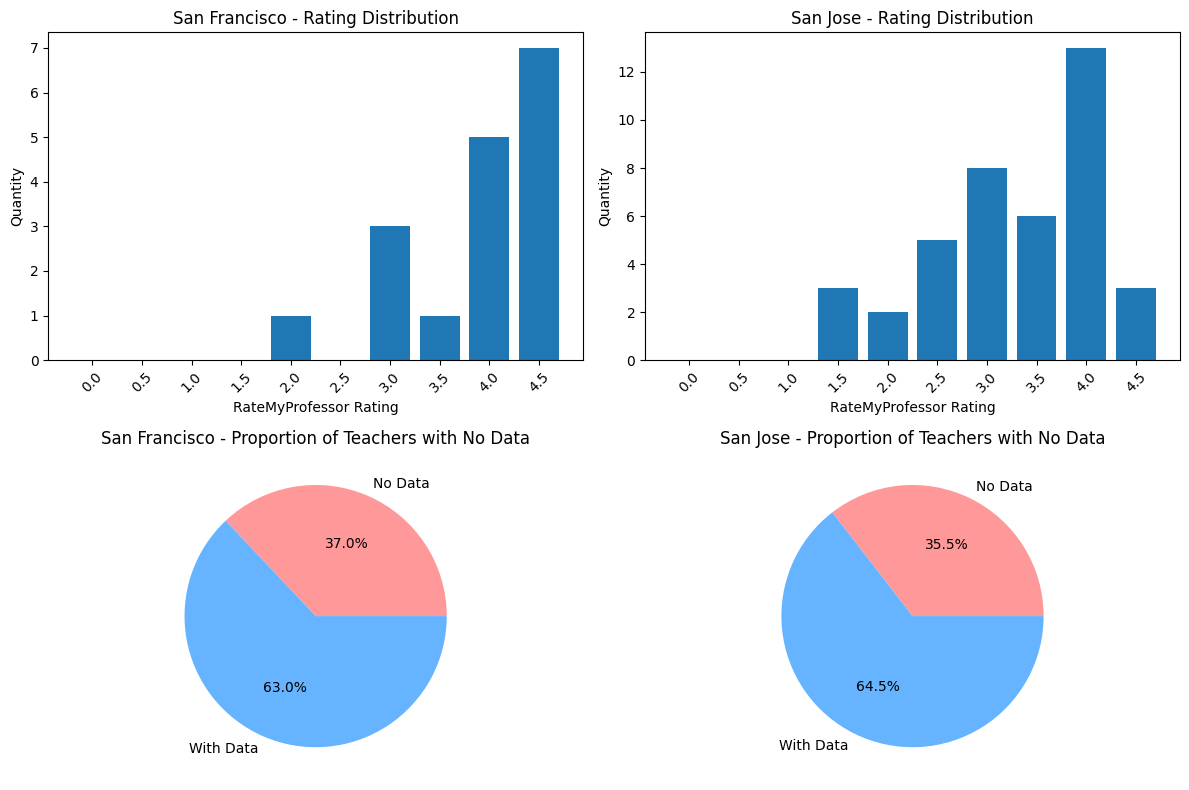

In [ ]:
import numpy as np
def get_rating_quantity_data(teacher_ratings):
    ratings = []
    no_data_count = 0
    for course in teacher_ratings.values():
        for teacher in course:
            if teacher[1] != 'N/A':
                ratings.append(float(teacher[1]))
            else:
                no_data_count += 1
    bins = np.arange(0, 5.5, 0.5)
    hist, _ = np.histogram(ratings, bins=bins)
    return bins[:-1], hist, no_data_count

def get_no_data_percentage(teacher_ratings):
    total_teachers = sum(len(teachers) for teachers in teacher_ratings.values())
    no_data_count = sum(1 for teachers in teacher_ratings.values() for teacher in teachers if teacher[1] == 'N/A')
    return no_data_count / total_teachers * 100

sf_ratings, sf_quantity, sf_no_data_count = get_rating_quantity_data(sf_teacher_ratings)
sj_ratings, sj_quantity, sj_no_data_count = get_rating_quantity_data(san_jose_teacher_ratings)
sf_no_data_percentage = get_no_data_percentage(sf_teacher_ratings)
sj_no_data_percentage = get_no_data_percentage(san_jose_teacher_ratings)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.bar(sf_ratings, sf_quantity, width=0.4)
ax1.set_xlabel('RateMyProfessor Rating')
ax1.set_ylabel('Quantity')
ax1.set_title('San Francisco - Rating Distribution')
ax1.set_xticks(sf_ratings)
ax1.set_xticklabels([f'{rating:.1f}' for rating in sf_ratings], rotation=45)

ax2.bar(sj_ratings, sj_quantity, width=0.4)
ax2.set_xlabel('RateMyProfessor Rating')
ax2.set_ylabel('Quantity')
ax2.set_title('San Jose - Rating Distribution')
ax2.set_xticks(sj_ratings)
ax2.set_xticklabels([f'{rating:.1f}' for rating in sj_ratings], rotation=45)

labels = ['No Data', 'With Data']
colors = ['#ff9999', '#66b3ff']

ax3.pie([sf_no_data_percentage, 100 - sf_no_data_percentage], labels=labels, colors=colors, autopct='%1.1f%%')
ax3.set_title('San Francisco - Proportion of Teachers with No Data')

ax4.pie([sj_no_data_percentage, 100 - sj_no_data_percentage], labels=labels, colors=colors, autopct='%1.1f%%')
ax4.set_title('San Jose - Proportion of Teachers with No Data')

plt.tight_layout()
plt.show()

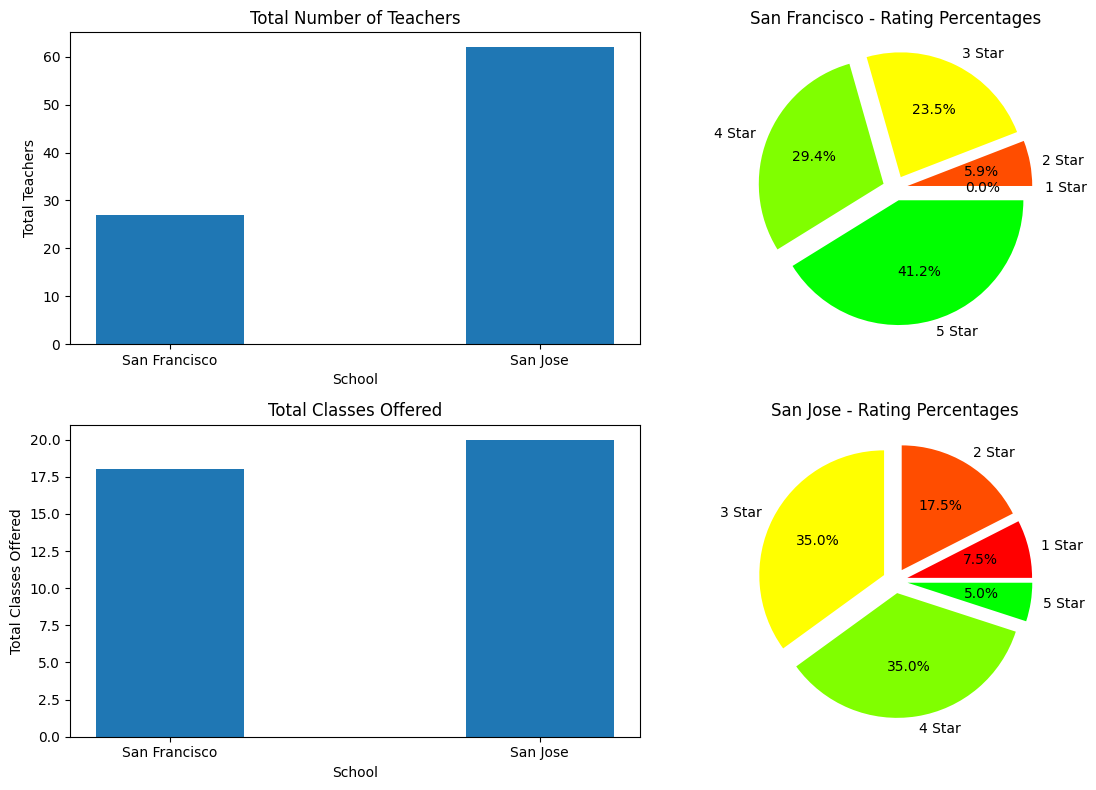

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_rating_quantity_data(teacher_ratings):
    ratings = []
    no_data_count = 0
    for course in teacher_ratings.values():
        for teacher in course:
            if teacher[1] != 'N/A':
                ratings.append(float(teacher[1]))
            else:
                no_data_count += 1
    bins = np.arange(0, 5.5, 0.5)
    hist, _ = np.histogram(ratings, bins=bins)
    return bins[:-1], hist, no_data_count

def get_no_data_percentage(teacher_ratings):
    total_teachers = sum(len(teachers) for teachers in teacher_ratings.values())
    no_data_count = sum(1 for teachers in teacher_ratings.values() for teacher in teachers if teacher[1] == 'N/A')
    return no_data_count / total_teachers * 100

def get_total_teachers(teacher_ratings):
    return sum(len(teachers) for teachers in teacher_ratings.values())

def get_rating_percentages(teacher_ratings):
    rating_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    for course in teacher_ratings.values():
        for teacher in course:
            if teacher[1] != 'N/A':
                rating = int(float(teacher[1]))
                rating_counts[rating] += 1
    total_ratings = sum(rating_counts.values())
    rating_percentages = {rating: count / total_ratings * 100 for rating, count in rating_counts.items()}
    return rating_percentages

def get_total_classes_offered(teacher_ratings):
    return sum(1 for teachers in teacher_ratings.values() if teachers)

sf_total_teachers = get_total_teachers(sf_teacher_ratings)
sj_total_teachers = get_total_teachers(san_jose_teacher_ratings)

sf_rating_percentages = get_rating_percentages(sf_teacher_ratings)
sj_rating_percentages = get_rating_percentages(san_jose_teacher_ratings)

sf_total_classes = get_total_classes_offered(sf_teacher_ratings)
sj_total_classes = get_total_classes_offered(san_jose_teacher_ratings)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.bar(['San Francisco', 'San Jose'], [sf_total_teachers, sj_total_teachers], width=0.4)
ax1.set_xlabel('School')
ax1.set_ylabel('Total Teachers')
ax1.set_title('Total Number of Teachers')

ax3.bar(['San Francisco', 'San Jose'], [sf_total_classes, sj_total_classes], width=0.4)
ax3.set_xlabel('School')
ax3.set_ylabel('Total Classes Offered')
ax3.set_title('Total Classes Offered')

colors = ['#ff0000', '#ff4d00', '#ffff00', '#80ff00', '#00ff00']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

ax2.pie(sf_rating_percentages.values(), labels=[f'{rating} Star' for rating in sf_rating_percentages.keys()],
        colors=colors, explode=explode, autopct='%1.1f%%')
ax2.set_title('San Francisco - Rating Percentages')

ax4.pie(sj_rating_percentages.values(), labels=[f'{rating} Star' for rating in sj_rating_percentages.keys()],
        colors=colors, explode=explode, autopct='%1.1f%%')
ax4.set_title('San Jose - Rating Percentages')

plt.tight_layout()
plt.show()

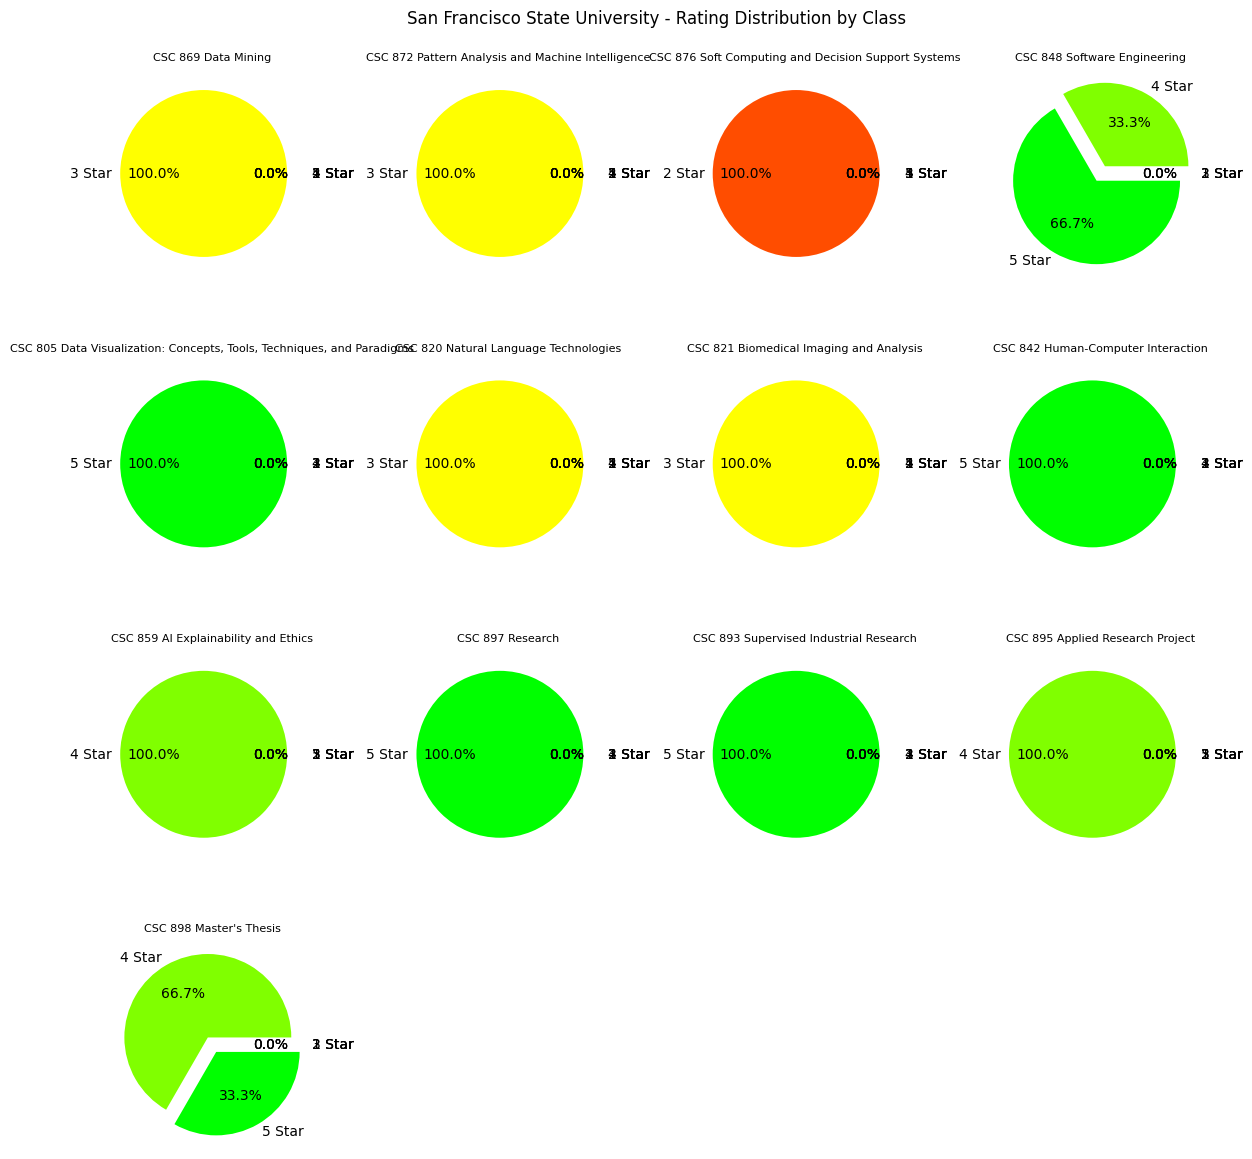

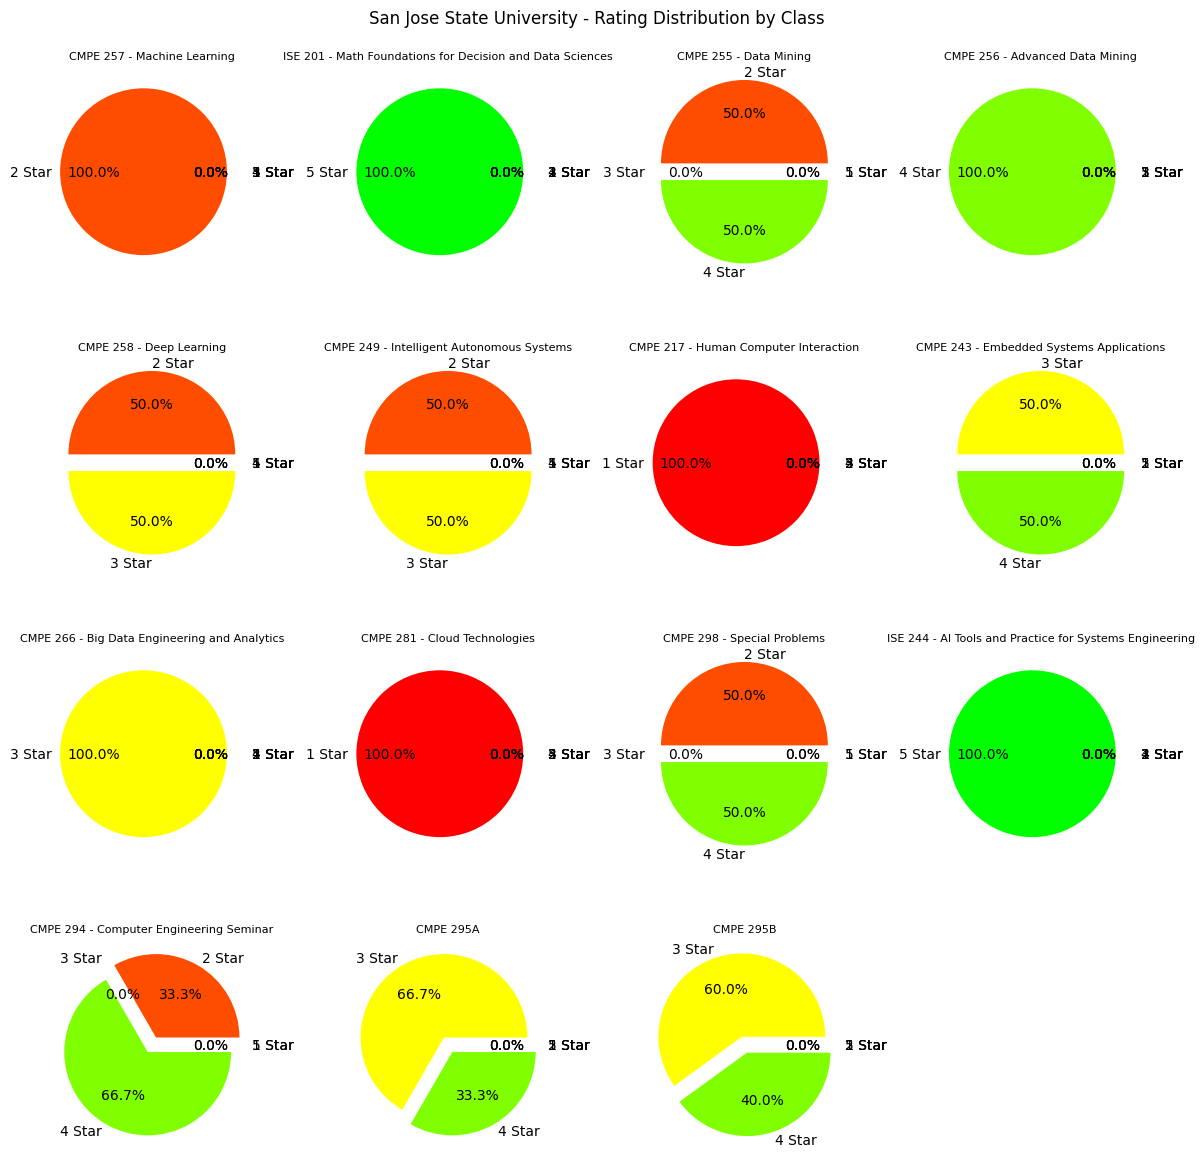

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_rating_percentages(teachers):
    rating_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    for teacher in teachers:
        if teacher[1] != 'N/A':
            rating = int(float(teacher[1]))
            if 1 <= rating <= 5:
                rating_counts[rating] += 1
    total_ratings = sum(rating_counts.values())
    if total_ratings > 0:
        rating_percentages = {rating: count / total_ratings * 100 for rating, count in rating_counts.items()}
    else:
        rating_percentages = {rating: 0 for rating in rating_counts.keys()}
    return rating_percentages

def plot_class_rating_distribution(teacher_ratings, title):
    num_classes = sum(1 for teachers in teacher_ratings.values() if teachers)
    num_cols = 4
    num_rows = (num_classes + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))
    axes = axes.flatten()
    colors = ['#ff0000', '#ff4d00', '#ffff00', '#80ff00', '#00ff00']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    i = 0
    for class_name, teachers in teacher_ratings.items():
        if teachers:
            rating_percentages = get_rating_percentages(teachers)
            if sum(rating_percentages.values()) > 0:
                axes[i].pie(rating_percentages.values(), labels=[f'{rating} Star' for rating in rating_percentages.keys()], colors=colors, explode=explode, autopct='%1.1f%%')
                axes[i].set_title(class_name, fontsize=8)
                i += 1
    for j in range(i, len(axes)):
        fig.delaxes(axes[j])
    plt.suptitle(title, fontsize=12)
    plt.tight_layout()
    plt.show()

plot_class_rating_distribution(sf_teacher_ratings, 'San Francisco State University - Rating Distribution by Class')
plot_class_rating_distribution(san_jose_teacher_ratings, 'San Jose State University - Rating Distribution by Class')

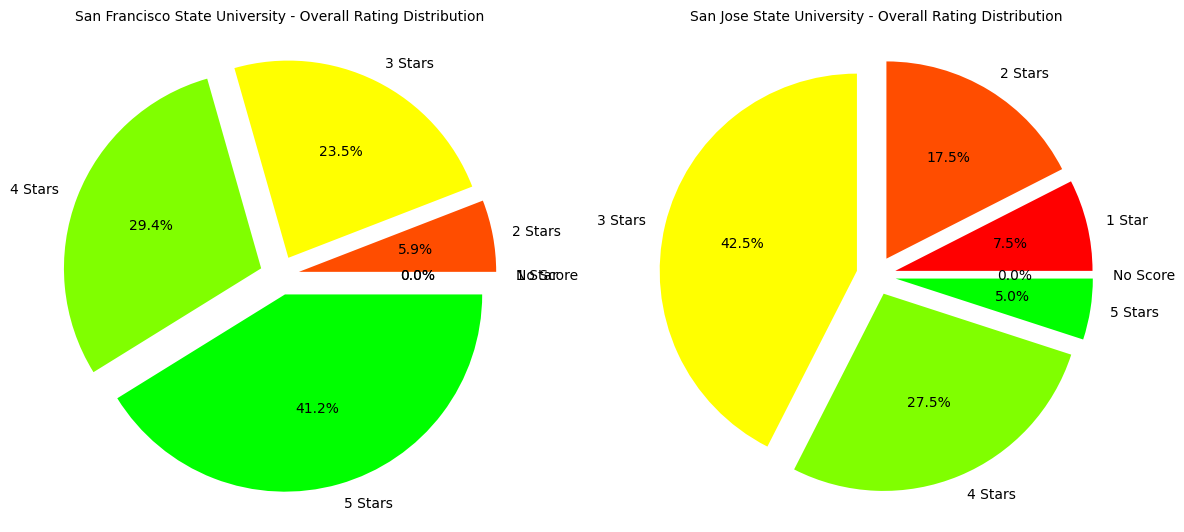

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_overall_rating_percentages(teacher_ratings):
    rating_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    for teachers in teacher_ratings.values():
        for teacher in teachers:
            if teacher[1] == 'N/A':
                rating_counts[0] += 1
            else:
                rating = int(float(teacher[1]))
                if 1 <= rating <= 5:
                    rating_counts[rating] += 1
    total_ratings = sum(rating_counts.values())
    if total_ratings > 0:
        rating_percentages = {rating: count / total_ratings * 100 for rating, count in rating_counts.items()}
    else:
        rating_percentages = {rating: 0 for rating in rating_counts.keys()}
    return rating_percentages

def plot_overall_rating_distribution(sf_teacher_ratings, sj_teacher_ratings):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    colors = ['#808080', '#ff0000', '#ff4d00', '#ffff00', '#80ff00', '#00ff00']
    labels = ['No Score', '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
    
    sf_rating_percentages = get_overall_rating_percentages(sf_teacher_ratings)
    ax1.pie(sf_rating_percentages.values(), labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
    ax1.set_title('San Francisco State University - Overall Rating Distribution', fontsize=10)
    
    sj_rating_percentages = get_overall_rating_percentages(sj_teacher_ratings)
    ax2.pie(sj_rating_percentages.values(), labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
    ax2.set_title('San Jose State University - Overall Rating Distribution', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_overall_rating_distribution(sf_teacher_ratings, san_jose_teacher_ratings)